In [7]:
import pickle

# Load your uploaded pickle file using the correct path
with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

print("Number of documents:", len(newsgroup_data))
print("\nFirst document preview:\n", newsgroup_data[0][:500])  # preview first doc


Number of documents: 2000

First document preview:
 The best group to keep you informed is the Crohn's and Colitis Foundation
of America.  I do not know if the UK has a similar organization.  The
address of
the CCFA is 

CCFA
444 Park Avenue South
11th Floor
New York, NY  10016-7374
USA

They have a lot of information available and have a number of newsletters.
 
Good Luck.


In [8]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return tokens

processed_docs = [preprocess(doc) for doc in newsgroup_data]

print("Example cleaned doc:", processed_docs[0][:20])


Example cleaned doc: ['best', 'group', 'keep', 'informed', 'crohns', 'colitis', 'foundation', 'america', 'know', 'similar', 'organization', 'address', 'ccfa', 'ccfa', 'park', 'avenue', 'south', 'floor', 'new', 'york']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
!pip install gensim


In [10]:
from gensim import corpora

# Create dictionary and bag-of-words corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print("Number of unique tokens in dictionary:", len(dictionary))


Number of unique tokens in dictionary: 22720


In [11]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10, random_state=42)

# Print top words for each topic
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"\nTopic {i + 1}:")
    print(", ".join([word for word, _ in topic]))



Topic 1:
one, would, dont, think, like, get, know, many, year, people

Topic 2:
would, one, like, dont, cancer, also, good, may, space, new

Topic 3:
one, time, space, get, also, information, nasa, email, available, would

Topic 4:
one, dont, msg, think, min, pick, games, nyr, game, wsh

Topic 5:
like, one, good, get, game, would, way, time, data, dont

Topic 6:
one, dont, game, know, get, would, like, good, use, back

Topic 7:
would, team, one, players, hockey, know, game, like, think, well

Topic 8:
one, period, new, power, also, good, think, dont, use, get

Topic 9:
would, get, time, car, much, one, dont, good, think, know

Topic 10:
drive, would, one, disk, scsi, drives, also, get, system, hard


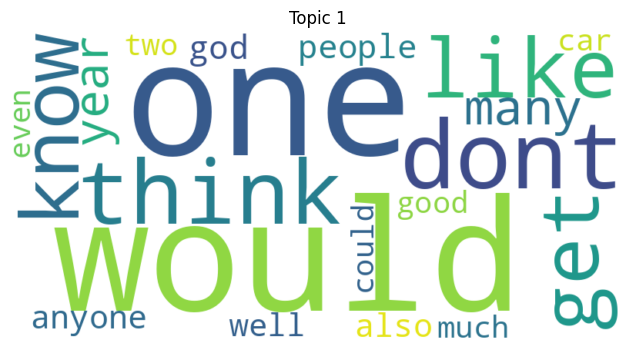

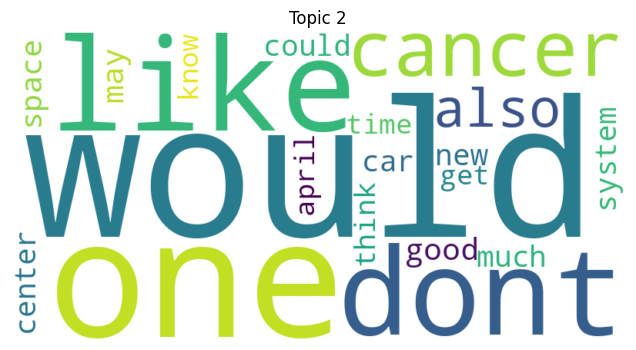

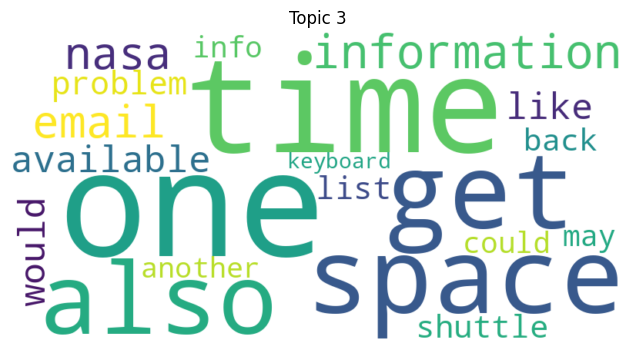

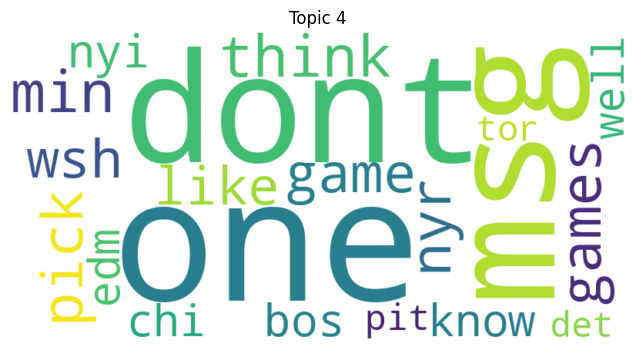

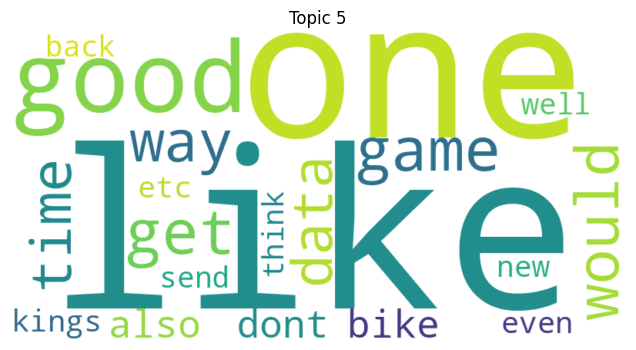

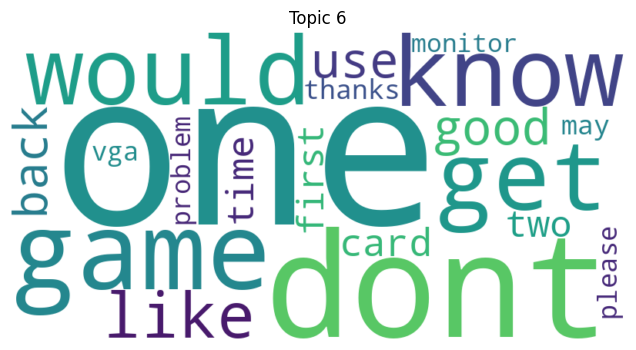

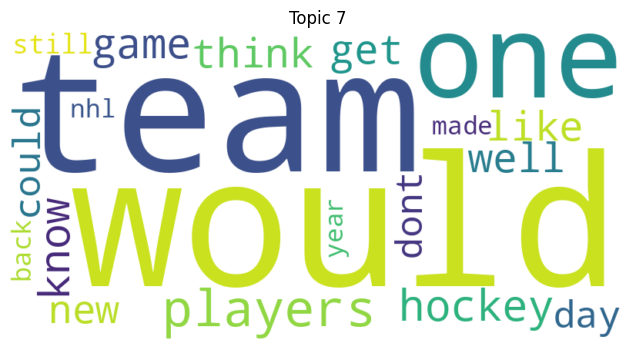

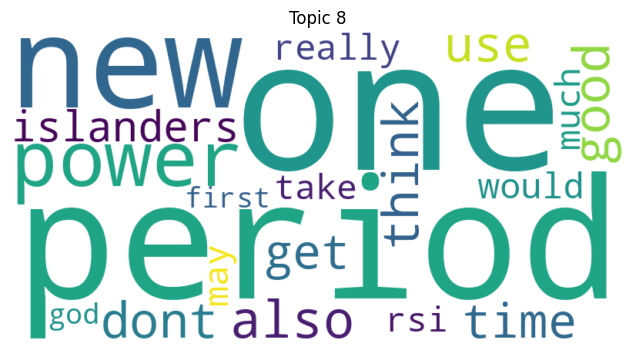

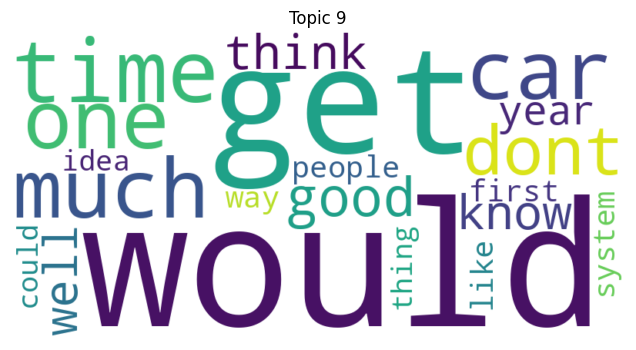

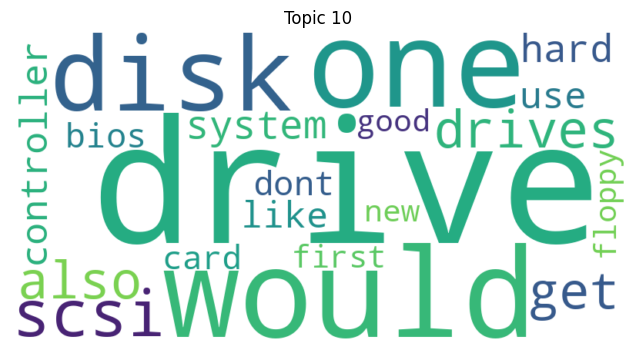

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for i, topic in lda_model.show_topics(num_topics=10, num_words=20, formatted=False):
    plt.figure(figsize=(8, 4))
    word_freqs = dict(topic)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqs)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {i + 1}")
    plt.show()
